In [6]:
# Calling required Packages
import os
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rio
import getpass
%matplotlib inline
import pydap
from pydap.client import open_url
import netCDF4
import rasterio

In [7]:
#Accessign the CMS data domain
USERNAME = ' '# put your CMS user name
PASSWORD = getpass.getpass('Please Enter Your CMS Password: ')
DATASET_ID = 'cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m' 

Please Enter Your CMS Password: ········


In [8]:
## Connecting OPeNDAP Server
def copernicusmarine_datastore(dataset, username, password):
    from pydap.client import open_url
    from pydap.cas.get_cookies import setup_session
    sig_url = 'https://cmems-cas.cls.fr/cas/login'
    session = setup_session(sig_url, username, password)
    session.cookies.set("CASTGC", session.cookies.get_dict()['CASTGC'])
    database = ['my', 'nrt']
    url = f'https://{database[0]}.cmems-du.eu/thredds/dodsC/{dataset}'
    try:
        dat_store = xr.backends.PydapDataStore(open_url(url, session=session)) 
    except:
        url = f'https://{database[1]}.cmems-du.eu/thredds/dodsC/{dataset}'
        dat_store = xr.backends.PydapDataStore(open_url(url, session=session))
    return dat_store

In [9]:
#Opening the data store
dat_store = copernicusmarine_datastore(DATASET_ID, USERNAME, PASSWORD)

# Exploring the dataset
dat_arr = xr.open_dataset(dat_store)
dat_arr

<xarray.Dataset>
Dimensions:           (latitude: 720, nv: 2, longitude: 1440, time: 349)
Coordinates:
  * latitude          (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude         (longitude) float32 0.125 0.375 0.625 ... 359.6 359.9
  * nv                (nv) int32 0 1
  * time              (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2022-01-15
Data variables:
    crs               int32 ...
    lat_bnds          (latitude, nv) float32 ...
    lon_bnds          (longitude, nv) float32 ...
    climatology_bnds  (time, nv) datetime64[ns] ...
    sla               (time, latitude, longitude) float64 ...
Attributes: (12/42)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Monthly Mean of Sea Level Anomalies refe...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         Delayed Time Level-4 monthly mean of sea...
    time_coverage_duration:          P1M
    time_coverage_end:               2022-01-31T00:00:00Z
    time_coverage_resolution:        P1M
    time_coverage_start:             2022-01-01T00:00:00Z
    title:                           DT merged all satellites Global Ocean Oc...

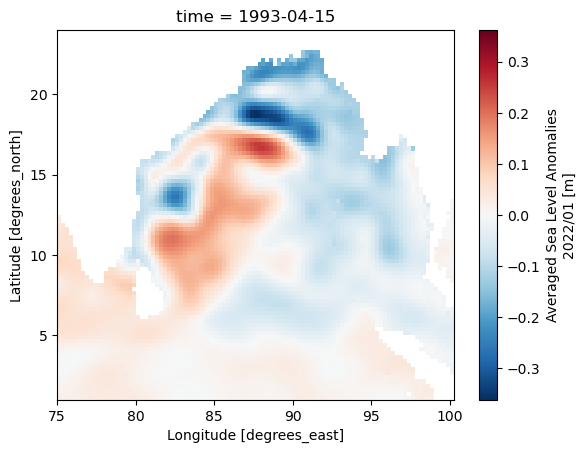

In [5]:
# Plotting AOI(Area of Interest)
p_aoi=dat_arr .sla.sel(time="1993-04-15").sel(longitude=slice(74.88, 100.2), latitude=slice(1,24))
p_aoi.plot()# Extent: Bay of Bengal

In [ ]:
# Changing working Directory
nd='Insert the path'
os.chdir(nd)

In [9]:
#Exporting Selected Data as NetCDF file
ncF1=p_aoi.to_netcdf("Sal_1993-03.nc", mode='w')

In [10]:
# Reading Exported file
ncF2 = xr.open_dataset('Sal_1993-03.nc')

In [12]:
# Extracting Desired variable
VarSla = ncF2['sla']

In [13]:
# Setting Spatial Dimension
VarSla  = VarSla .rio.set_spatial_dims('longitude', 'latitude')
# Specifying projection System
prjSla=VarSla .rio.set_crs("epsg:4326") # WGS 84 

In [19]:
# Exporting final Raster
prjSla.rio.to_raster(r"Sla_1993-03.tif")

In [ ]:
### End##